## EDA анализ данных. Разведывательный анализ данных.
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, нужно провести разведывательный анализ данных и составьте отчёт по его результатам. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind

sns.set()

%matplotlib inline

In [55]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

grade = pd.read_csv('stud_math.csv')

grade.rename(columns={'studytime, granular':'granular'}, inplace=True) #переименовал столбец
grade.columns = map(str.lower, grade.columns) #преобразовал названия столбцов, уменьшил регистр

print(grade.shape)

(395, 30)


In [56]:
grade

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Описание датасета

1 school — аббревиатура школы, в которой учится ученик;

2 sex — пол ученика ('F' - женский, 'M' - мужской);

3 age — возраст ученика (от 15 до 22);

4 address — тип адреса ученика ('U' - городской, 'R' - за городом);

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3);

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно);

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое);

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.);

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов);

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0);

16 schoolsup — дополнительная образовательная поддержка (yes или no);

17 famsup — семейная образовательная поддержка (yes или no);

18 paid — дополнительные платные занятия по математике (yes или no);

19 activities — дополнительные внеучебные занятия (yes или no);

20 nursery — посещал детский сад (yes или no);

21 higher — хочет получить высшее образование (yes или no);

22 internet — наличие интернета дома (yes или no);

23 romantic — в романтических отношениях (yes или no);

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо);

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого);

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много);

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);

28 absences — количество пропущенных занятий;

29 score — баллы по госэкзамену по математике;

Судя по информации этот DataFrame имеет 30 стобцов и 395 строк. Для объективного анализа нужны данные, а 395 строк это не так много. 
Например в столбцах: "famsize","pstatus","fjob","traveltime","paid", "internet", "romantic", пропуски составляют около 10% информации. Чтобы не потерять достаточно весомый процент данных, пропущенные значения следует не удалять, а заполнять.
    
Заполнение данных будет осуществляться следующим образом:
- пропущенные числовые характеристики, после устранения выбросов, будут заполняться медианой;
- пропущенные ранговые характеристики, в большинстве своем, будут заполняться модой. Исключением послужат столбцы, которые имеют взаимосвязанные признаки;

Оценив название столбцов и те параметры которые они в себе несут, можно сделать вывод, что лишних (не информативных) столбцов в данном DataFrame нет. На успеваемость ученика могут повлиять все эти на первый взгляд безобиные обстоятельста. Исключением служит столбец "studytime, granular", назначение котрого позже будет понятно.

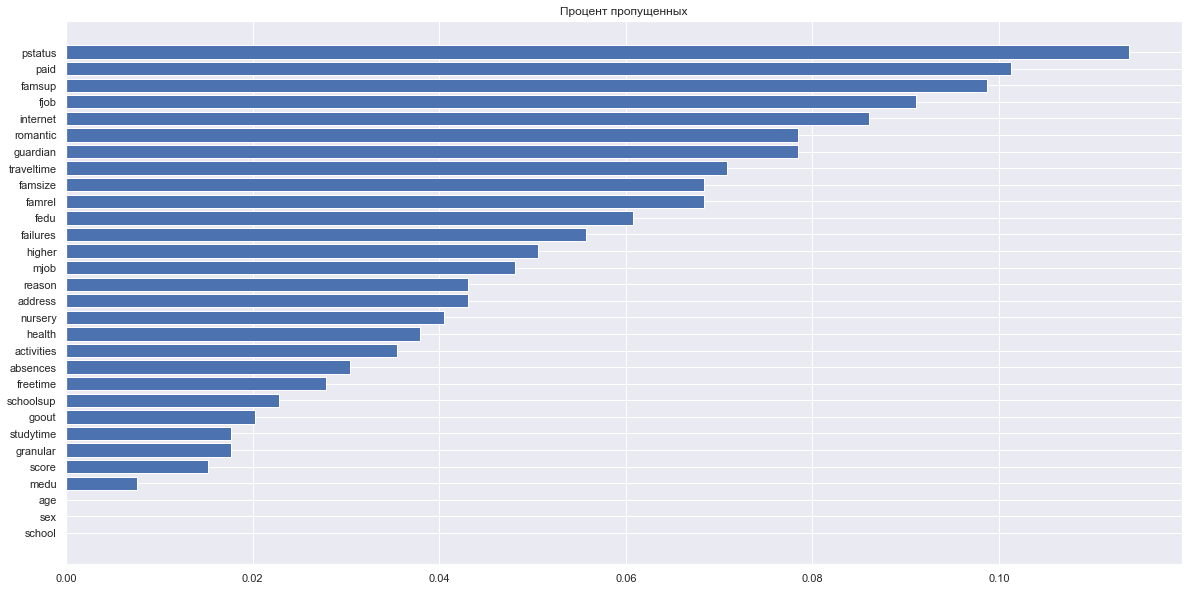

In [7]:
emptys = (grade.isnull().sum() / grade.shape[0]).sort_values()

plt.figure(figsize=(20, 10))
plt.title('Процент пропущенных')
plt.barh(emptys.index, emptys.values)
plt.show()

In [8]:
grade.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [9]:
def plot_columns(df: pd.DataFrame, columns: list, nrows: int, nclmns: int):
    """
    Функция принимает на вход:
        DataFrame
        Названия колонок, для которых нужны графики
        Количество <<строк>> в графиках
        Количество <<колонок>> в графиках
    """
    fig, axes = plt.subplots(figsize=(nrows * 5, nclmns * 10), nrows=nrows, ncols=nclmns)
    # создаем объекты fig, axes
    cur_row = 0
    cur_col = 0
    for column in columns:
        cur_axes = axes[cur_row, cur_col]              
        sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=cur_axes)

        cur_axes.set_title('Boxplot for ' + column)
        
        if cur_col < nclmns - 1:
            cur_col += 1
        else:
            cur_col = 0
            cur_row += 1
            
            
def estimate_categorical_feature(column: pd.Series):
    """
    Функция принимает на вход объект типа "series".
       Возвращает:
       гистаграмму с распределением величин этого стобца
       количество пропущенных значений
       для объектов типа "object" возвращает моду
       для объектов типа "float" и "int" возвращает медиану.
    """
    print('В данном столбце {} незаполненых значений.'.format(column.isnull().sum()))
    plt.title(f'Распределение {column.name}')
    if column.dtype == 'O':
        print(f'Мода: {column.mode()[0]}')
    else:
        print(f'Среднее: {round(column.mean(), 0)}')
    v_counts = column.value_counts()
    plt.bar(v_counts.index, v_counts.values, width = 1)
    plt.show()

    
def get_mode(column: pd.Series):
    """
    Функция примает на вход столбец,
       заполняет пустые значения модой 
       и сохраняет в Data Frame.
    """
    return column.fillna(column.mode()[0], inplace=True)


def fill_pstatus_famsize(row, famsize_mode, pstatus_mode):
    """
    Функция принимает на вход 3 аргуманта (столбец и две моды)
       и заполняет оба столбца одноверменно логика:
       если родители в браке, то вероятнее, что в семье больше 3-х человек.
    """
    if pd.isnull(row['famsize']):
        if pd.isnull(row['pstatus']):
            row['pstatus'] = pstatus_mode
            row['famsize'] = famsize_mode
        elif row['pstatus'][0] == 'T':
            row['famsize'] = 'GT3'
        elif row['pstatus'][0] == 'A':
            row['famsize'] = 'LE3'
    else:
        if pd.isnull(row['pstatus']):
            if row['famsize'][0] == 'GT3':
                row['pstatus'] = 'T'
            else:
                row['pstatus'] = 'A'
    return row


def fill_reason(row):
    """
    Принимает на вход стоку и заполняет пустые значения по логике выбор школы осуществлен:
        если родители учителя то по образовательной программе
        если родители госслужащие то по репутации
        если время до школы состаляло меньше 15 мин то по длизости к дому
    """
    if pd.isnull(row['reason']):
        if row['mjob'][0] == 'teacher'  or row['fjob'][0] == 'teacher':
            row['reason'] = 'course'
        elif row['mjob'][0] == 'service'  or row['fjob'][0] == 'service':
            row['reason'] = 'reputation'
        elif row['traveltime'] == '1':
            row['reason'] = 'home'
    return row


def fill_schoolsup(row):
    """
    Данная функция принимает на вход строку и заполняет пропущенное значение по логике
        если есть семейная образовательная поддержка, если есть дополнитльные заняти по математике,
        если есть дополнительные внеучебные занятия, то и есть дополнительная образовательная поддержка
    """
    if pd.isnull(row['schoolsup']):
        if row['famsup'] == 'yes' or row['paid'] == 'yes' or row['activities'] == 'yes':
            row['schoolsup'] = 'yes'
        else:
            row['schoolsup'] = 'no'
    return row


def fill_famsup(row):
    """
    Принимает на вход строку и заполняет пустые значения по логике:
        если родители работают преподователями, то семейная образовательная поддержка есть,
        если не работают преподователями, то семейной образовательной поддержки нет."""
    if pd.isnull(row['famsup']):
        if row['mjob'] == 'teacher'or row['fjob'] == 'teacher':
            row['famsup'] = 'yes'
        else:
            row['famsup'] = 'no'
    return row


def fill_paid(row):
    """
    Принимает на вход строку и заполняет пустые значения по логике:
        если ученик посещает платные занятия по математике, значит он 
        хочет получить высшее образование"""
    if pd.isnull(row['paid']):
        if row['higher'] == 'yes':
            row['paid'] = 'yes'
        else:
            'no'
    return row


def fill_activities(row):
    """
    Принимает на вход строку и заполняет пропущенные значения по ллогике:
        если "famsup" семейная образовательная поддержка есть, 
        если "paid" дополнительные занятия по математике есть, 
        если "schoolsup" если дополнительная образовательная поддержка есть, 
        тогда пустые значения принимают значение "yes".
    """
    if pd.isnull(row['activities']):
        if row['paid'] == 'yes' or row['schoolsup'] == 'yes' or row['famsup'] == 'yes':
            row['activities'] = 'yes'
        else:
            'no'
    return row

## 1. Столбец (school)
В данном столбце пропущенных значений нет. Выбросов нет. Основная часть учеников получала образование в школе "GP". Данные в столбце имеют котегориальный (ранговый) формат данных.

В данном столбце 0 незаполненых значений.
Мода: GP


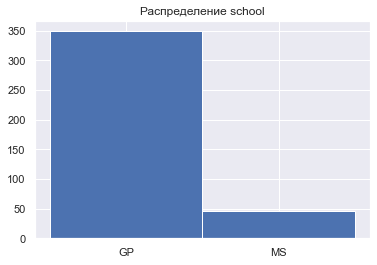

In [15]:
estimate_categorical_feature(grade['school'])

## 2. Столбец (sex)
В данном столбце пропущенных значений нет. Выбросов нет. Ученики примерно в равном соотношении распределены по половому признаку. 

В данном столбце 0 незаполненых значений.
Мода: F


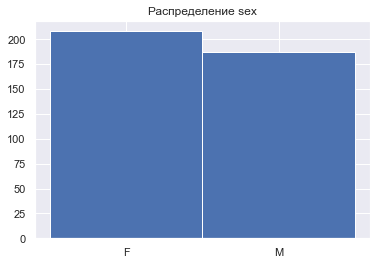

In [20]:
estimate_categorical_feature(grade['sex'])

## 3. Столбец (age)
В данном столбце пропущенных значений нет. Выбросов нет.(Предполагаю, что ученики старше 18 лет просто позже пошли в школу, ну ил оставались на второй (третий) год).

В данном столбце 0 незаполненых значений.
Среднее: 17.0


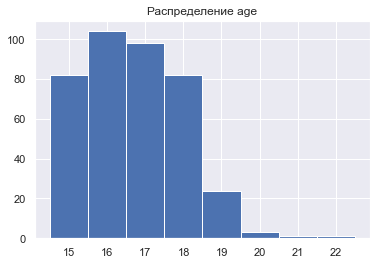

In [21]:
estimate_categorical_feature(grade['age'])

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


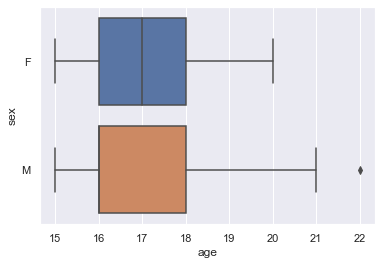

In [22]:
sns.boxplot(x='age', y='sex', data=grade)
grade[grade.age >19]

## 4. Столбец (address)
В данном столбце есть 17 пропущенных значений. Ввиду того, что подавляющее большинство  проживает в городе - заполню пустые значения модой.( Выбросов нет)

В данном столбце 17 незаполненых значений.
Мода: U


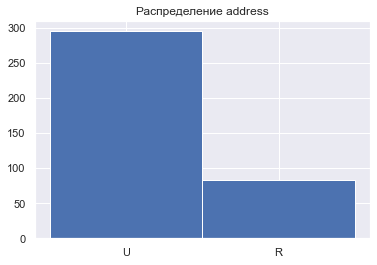

In [23]:
estimate_categorical_feature(grade['address'])

In [10]:
get_mode(grade['address'])

## 5. Столбец (famsize)
Данный столбец имеет 17 незаполненых значений. Т.К. данные столбца указывают на количество членов семей, а следующий столбец "pstatus" обозначает статус семейной жизни родителей, то можно сделать предположение: "Если родители в браке,  то вероятност того, что семья имеет больше трех человек (GT3) выше". Заполнение пустых значений этого столбца проведено по этому принципу.

В данном столбце 27 незаполненых значений.
Мода: GT3


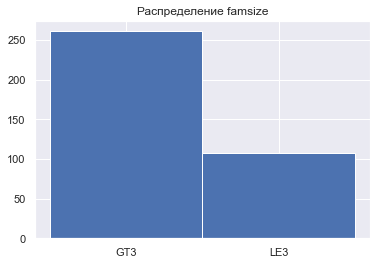

In [25]:
estimate_categorical_feature(grade['famsize'])

In [11]:
get_mode(grade['famsize'])

Функция принимает на вход 3 аргуманта (столбец и две моды).
Заполняет оба столбца одноверменно логика:
       если родители в браке, то вероятнее, что в семье больше 3-х человек.

In [12]:
pstat_mode, famsize_mode = grade['pstatus'].mode()[0], grade['famsize'].mode()[0]
print('Было')
print(grade[['famsize', 'pstatus']].value_counts())

grade = grade.apply(
    fill_pstatus_famsize, # сама функция, которую будем использовать
    args=(famsize_mode, pstat_mode), # дополнительные аргументы, заранее посчитанные
    axis=1, # будем обрабатывать не столбцы целиком, а строки
)

print('Стало')
print(grade[['famsize', 'pstatus']].value_counts())

Было
famsize  pstatus
GT3      T          233
LE3      T           81
GT3      A           23
LE3      A           13
dtype: int64
Стало
famsize  pstatus
GT3      T          233
LE3      T           81
GT3      A           55
LE3      A           26
dtype: int64


## 6. Столбец (pstatus)
В данном столбце до преобразовния было 45 пустых значени, эти значения заполнялись в предидущей итерации с помощью функции "fill_pstatus_famsize"

В данном столбце 0 незаполненых значений.
Мода: T


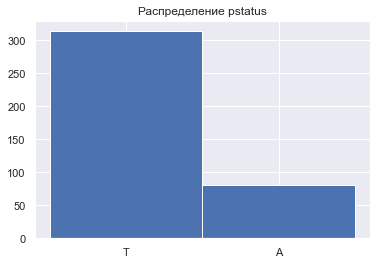

In [28]:
estimate_categorical_feature(grade['pstatus'])

## 7. Столбец (medu)
Данный столбец имеет 3 незаполненых значения. Выбросов нет. Заполнение пустых занений средним сильно на статистику не повлияет.

В данном столбце 3 незаполненых значений.
Среднее: 3.0


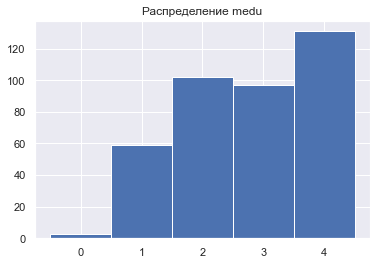

In [29]:
estimate_categorical_feature(grade['medu'])

In [13]:
get_mode(grade['medu'])

## 8. Столбец (fedu)
В данном столбце имеется 24 пустых значения, а также 1 выброс. Ввиду того, что выброс "40.0", а даные для оценки параметра fedu имели пятибальную шкалу, можно допустить, что при внесении данных был введен лишний ноль. данный выброс будет исправлен путем деления на 10. После исправления выброса стало видно, что данные распределены по нормальному закону, не то, что у женщин. Заполнение пустых значений буду осуществлять медианой.

В данном столбце 24 незаполненых значений.
Среднее: 3.0


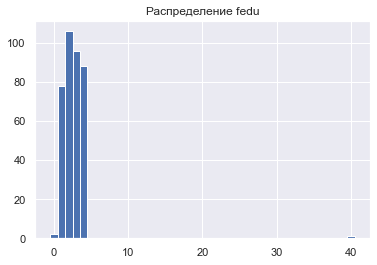

In [31]:
estimate_categorical_feature(grade['fedu'])

In [32]:
grade.fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

In [14]:
grade['fedu'] = grade.fedu.apply(lambda x: x/10 if x > 4 else x)

В данном столбце 24 незаполненых значений.
Среднее: 3.0


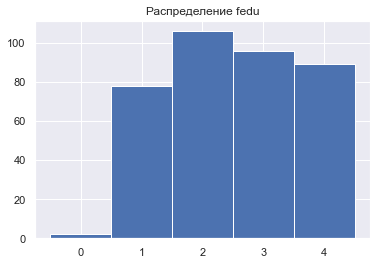

In [34]:
estimate_categorical_feature(grade['fedu'])

In [15]:
get_mode(grade['fedu'])

## 9. Столбец (mjob)
Данный столбец имеет 19 пропусков, по смыслу заполнить их значением "other", которое кстати еще и является модой данного столбца, будет смаое верное решение.

В данном столбце 19 незаполненых значений.
Мода: other


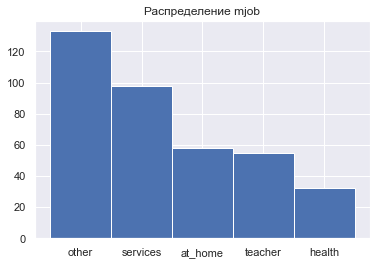

In [36]:
estimate_categorical_feature(grade['mjob'])

In [16]:
get_mode(grade['mjob'])

## 10. Столбец (fjob)
Данный столбец имеет 36 пропусков. Логика заполнения таже, что и в "mjob"

В данном столбце 36 незаполненых значений.
Мода: other


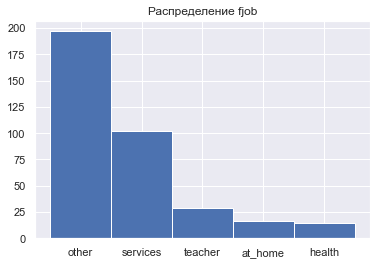

In [38]:
estimate_categorical_feature(grade['fjob'])

In [17]:
get_mode(grade['fjob'])

По анализу гистограм 2-х столбцов "fjob" и "mjob" можно сделать вывод, что эти столбцы имеют взаимосвязь. Проверяем.

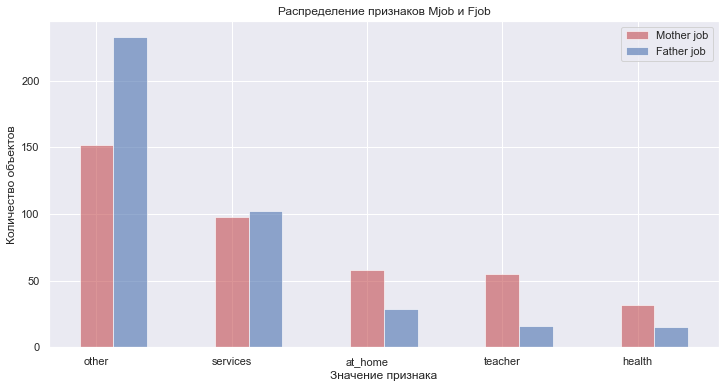

In [18]:
mjob_value_counts = grade['mjob'].value_counts()
fjob_value_counts = grade['fjob'].value_counts()

plt.figure(figsize=(12, 6)) # создаем фигуру, в которой будет график, задаем ее размеры
column_width = 0.5 # ширина столбца = 1 / количество цветов, которые будем использовать

x_positions_1 = np.arange(len(mjob_value_counts.index)) # координаты X для первого графика
x_positions_2 = x_positions_1 + column_width / 2 # сдвигаем для того, чтобы все столбцы сдвинулись правее для второго графика

# 1 график
plt.bar(
    x_positions_1,
    height=mjob_value_counts.values,
    color='r',
    alpha=0.6,
    width=column_width / 2,
    label='Mother job'
)

# 2 график
plt.bar(
    x_positions_2,
    height=fjob_value_counts.values,
    color='b',
    alpha=0.6,
    width=column_width / 2,
    label='Father job'
)

# подпишем значения на X оси:
plt.xticks(
    x_positions_1, # будем подписывать там, где красные столбцы
    mjob_value_counts.index
)

plt.title("Распределение признаков Mjob и Fjob")
plt.xlabel("Значение признака")
plt.ylabel("Количество объектов")
# создадим легенду
plt.legend()
plt.show()

Данные столбцы имеют одинаковое рапределение признаков, после применения диаграмм размаха ниже стало ясно, что на результа экзамена по математике очень влияет наличие образования "teacher" у любого из родителей. В итоговой модели можно будет создать новый бинарный признак с логикой: если кто-то из родителей работает по специальности "teacher", то в целом в семье есть забота об успеваемости ребенка.

## 11. Столбец (reason)
Данный столбец имеет 17 пропусков. Заполнение этого столбца осущетвлялось по логике: выбор школы осуществлен:
    если родители учителя то по образовательной программе
    если родители госслужащие то по репутации
    если время до школы состаляло меньше 15 мин то по длизости к дому.

В данном столбце 17 незаполненых значений.
Мода: course


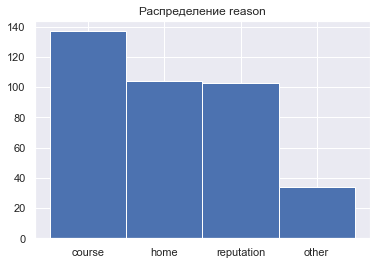

In [41]:
estimate_categorical_feature(grade['reason'])

In [19]:
print('Было')
print(grade['reason'].value_counts())

grade = grade.apply(
    fill_reason, 
    axis=1, 
)

print('Стало')
print(grade['reason'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.reason.isnull().sum()))

Было
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
Стало
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
В данном столбце 17 незаполненых значений.


После применения функции пустые значения не заполнены, ввиду того, что ни одна из логик не сработала.
Это означает, что теперь я могу заполнить пустые значения значением "other".

In [20]:
grade.reason.fillna('other', inplace = True)

## 12. Столбец (guardian) - опекун
Данный столбец достаточно сложно интерпритировать. В данном столбце пустые значения заполню значением "NoData"

В данном столбце 31 незаполненых значений.
Мода: mother


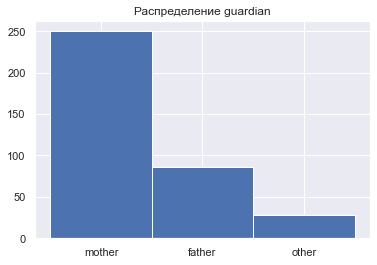

In [44]:
estimate_categorical_feature(grade['guardian'])

In [21]:
grade.guardian.fillna('NoData', inplace = True)

## 13. Столбец (traveltime) - время в пути до школы
В данном столбце 28 незаполненых значений. Можно предположить:
1. В одну из школ в целом дольше добираться;
2. Ученики проживающие в деревне тратят больше времени на дорогу.

После анализа, путем групирровки данных, есть понимание:
- школы с абревиатурами "GP" "MS" ученики добираются и из города и из деревни
- школы и в городе и в деревне в равной степенеи удалены от мест жительства учеников

За отсутствием характерных признаков пропущенные значения заполню модой.

В данном столбце 28 незаполненых значений.
Среднее: 1.0


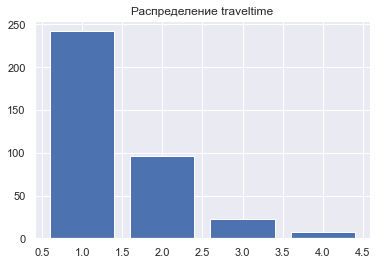

school  address  traveltime
GP      U        1.0           200
                 2.0            58
        R        1.0            29
                 2.0            18
MS      U        2.0            12
GP      U        3.0             9
MS      U        1.0             8
        R        2.0             8
                 3.0             7
                 1.0             5
GP      R        3.0             5
        U        4.0             3
        R        4.0             3
MS      U        3.0             1
        R        4.0             1
dtype: int64

In [68]:
estimate_categorical_feature(grade['traveltime'])

grade[['school','address','traveltime']].value_counts()

In [22]:
get_mode(grade['traveltime'])

## 14. Столбец (studytime) - время на учёбу помимо школы в неделю
В данном столбце есть 7 незаполненых значений, зполнение которых осуществлю медианой.

В данном столбце 7 незаполненых значений.
Среднее: 2.0


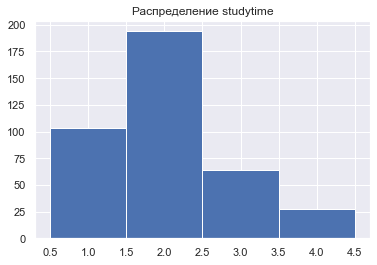

In [47]:
estimate_categorical_feature(grade['studytime'])

In [23]:
get_mode(grade['studytime'])

## 15. Столбец (failures) - количество "фиаско братан"
Данный столбец, хоть и числовой, но несет котегориальный характер. Само понятие "фиаско" носит случайный характер, но безусловно влияет на успеваемость. Данные пропущеные сзначения заполняются модой.

В данном столбце 22 незаполненых значений.
Среднее: 0.0


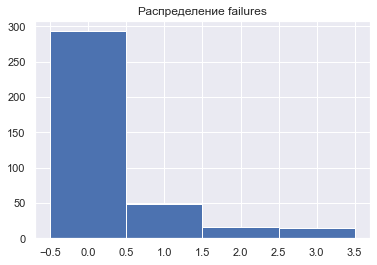

In [49]:
estimate_categorical_feature(grade['failures'])

In [24]:
get_mode(grade['failures'])

## 16. Столбец (schoolsup) - дополнительная образовательная поддержка
В данном столбце 9 незаполненых значений. Заполнение значений этого столбца осуществляется после заполнения пустых знаяений столбца "famsup", это связано с тем, что если есть домашняя образовательная поддержка, то ее можно относить к дополнительной образовательной поддержке. Так же можно проверить и столбцы "paid" (доп занятия по математике), "activities" (доп внеучебные занятия). По этому принципу будет произведено заполнение пустых значений в данном столбце.

В данном столбце 9 незаполненых значений.
Мода: no


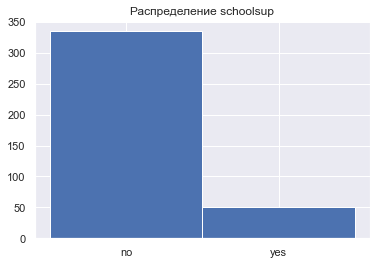

In [51]:
estimate_categorical_feature(grade['schoolsup'])

In [25]:
print('Было')
print(grade['schoolsup'].value_counts())

grade = grade.apply(
    fill_schoolsup, # сама функция, которую будем использовать
    axis=1, # будем обрабатывать не столбцы целиком, а строки
)

print('Стало')
print(grade['schoolsup'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.schoolsup.isnull().sum()))

Было
no     335
yes     51
Name: schoolsup, dtype: int64
Стало
no     337
yes     58
Name: schoolsup, dtype: int64
В данном столбце 0 незаполненых значений.


## 17. Столбец (famsup) - семейная образовательная поддержка
Данный столбец иимеет 39 пропущенных значений, но его название однозначно указывает на следующее: если родители работают учителями вероятность того, что есть семенная образовательная поддержка выше. Заполнять пропущенные значения буду исходя из этого.

В данном столбце 39 незаполненых значений.
Мода: yes


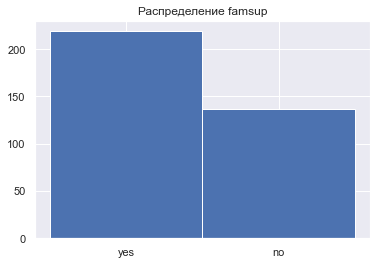

In [53]:
estimate_categorical_feature(grade['famsup'])

In [26]:
print('Было')
print(grade['famsup'].value_counts())

grade = grade.apply(
    fill_famsup, # сама функция, которую будем использовать
    axis=1, # будем обрабатывать не столбцы целиком, а строки
)

print('Стало')
print(grade['famsup'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.famsup.isnull().sum()))

Было
yes    219
no     137
Name: famsup, dtype: int64
Стало
yes    226
no     169
Name: famsup, dtype: int64
В данном столбце 0 незаполненых значений.


## 18. Столбец  (paid) - дополнительные платные занятия по математике

В данном столбце не заполнено 40 значений. Это достаточно много. Ввиду того, что значения распределены почи в равном соотношении, пустые значения буду заполнять исходя из взаимосвязи со столбцом "higher " (хочет получить высшее образование), зачастую это единственная мотивация для дополнительных ПЛАТНЫХ занятий.

В данном столбце 40 незаполненых значений.
Мода: no


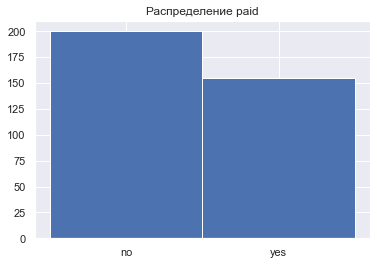

In [55]:
estimate_categorical_feature(grade['paid'])

In [27]:
print('Было')
print(grade['paid'].value_counts())

grade = grade.apply(
    fill_paid, # сама функция, которую будем использовать
    axis=1, # будем обрабатывать не столбцы целиком, а строки
)

print('Стало')
print(grade['paid'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.paid.isnull().sum()))

Было
no     200
yes    155
Name: paid, dtype: int64
Стало
no     200
yes    191
Name: paid, dtype: int64
В данном столбце 4 незаполненых значений.


После заполнения столбца осталось 4 значения, думаю это связано с тем, что сам столбец "higher" имеет незаполненые значени.
Заполню их модой столбца.

In [28]:
print('Было')
print(grade['paid'].value_counts())

grade.paid.fillna(grade.paid.mode()[0], inplace=True)

print('Стало')
print(grade['paid'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.paid.isnull().sum()))

Было
no     200
yes    191
Name: paid, dtype: int64
Стало
no     204
yes    191
Name: paid, dtype: int64
В данном столбце 0 незаполненых значений.


## 19. Столбец (activities) - дополнительные внеучебные занятия
В этом столбце есть 14 пезаполненых значений. Распределение между признаками равномерно. Логика следующая: если "famsup" семейная образовательная поддержка есть, если "paid" дополнительные занятия по математике есть, если "schoolsup" если дополнительная образовательная поддержка есть, тогда заполняем знаяением "yes".

В данном столбце 14 незаполненых значений.
Мода: yes


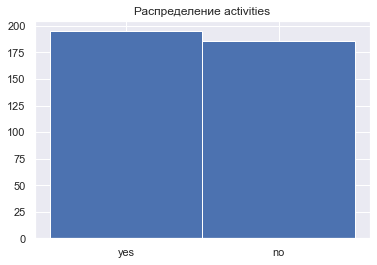

In [58]:
estimate_categorical_feature(grade['activities'])

In [29]:
print('Было')
print(grade['activities'].value_counts())

grade = grade.apply(
    fill_activities, # сама функция, которую будем использовать
    axis=1, # будем обрабатывать не столбцы целиком, а строки
)

print('Стало')
print(grade['activities'].value_counts())
print('В данном столбце {} незаполненых значений.'.format(grade.activities.isnull().sum()))

Было
yes    195
no     186
Name: activities, dtype: int64
Стало
yes    206
no     186
Name: activities, dtype: int64
В данном столбце 3 незаполненых значений.


Осталось 3 незаполненых значения. Логика подсказывает, что если всех этих доп образований нет, то следует заполнить значение no.

In [30]:
grade.activities.fillna('no', inplace=True)
print('В данном столбце {} незаполненых значений.'.format(grade.activities.isnull().sum()))

В данном столбце 0 незаполненых значений.


## 20.Столбец (nursery) - посещал детский сад
Данный столбец имеет 16 пропущенных значений. Данный столбец носит категориальный характер, судя по которому большинство учеников посещало детский сад. Заполнение буду производить модой.

В данном столбце 16 незаполненых значений.
Мода: yes


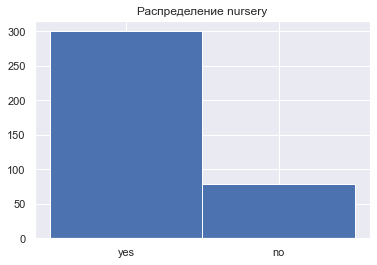

In [61]:
estimate_categorical_feature(grade['nursery'])

In [31]:
get_mode(grade['nursery'])

## 21. Столбец (higher) — хочет получить высшее образование
Данный столбец имеет 20 пропущенных значений. Данный столбец носит категориальный характер, судя по которому большинство учеников посещало детский сад. Заполнение буду производить модой.

В данном столбце 20 незаполненых значений.
Мода: yes


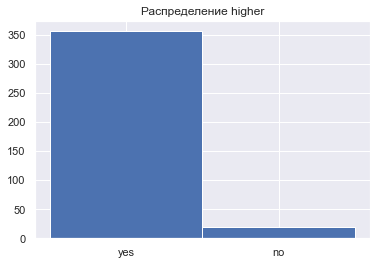

In [63]:
estimate_categorical_feature(grade['higher'])

In [32]:
get_mode(grade['higher'])

## 22. Столбец (internet) — наличие интернета дома
Данный столбец имеет 20 пропущенных значений. Данный столбец носит категориальный характер, судя по которому большинство учеников дома имеют интернет. Заполнение буду производить модой.

В данном столбце 34 незаполненых значений.
Мода: yes


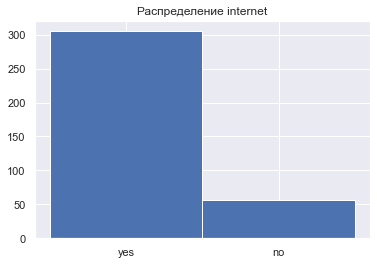

In [65]:
estimate_categorical_feature(grade['internet'])

In [33]:
get_mode(grade['internet'])

## 23. Столбец (romantic) — в романтических отношениях
Данный столбец имеет 31 пропущенное значение. Заполнить эти данные каким либо значение не предоставляется возможным. Заполнение будет произведено значение "NoData"

В данном столбце 0 незаполненых значений.
Мода: yes


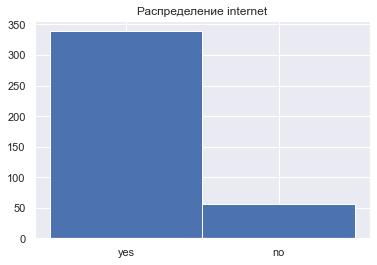

In [67]:
estimate_categorical_feature(grade['internet'])

In [34]:
grade.romantic.fillna('NoData', inplace=True)

## 24. Столбец (famrel) — семейные отношения
В данном столбце есть выброс. Сложно судить каким образом вводили данные, но так как  по модулю это значение подходит под пятибальную шкалу оценки параметров, то просто следует убрать минус.

В данном столбце 27 незаполненых значений.
Среднее: 4.0


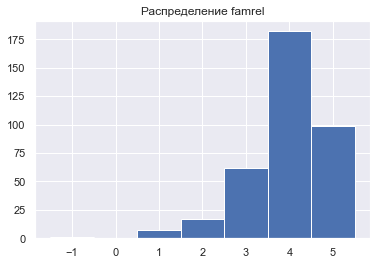

In [69]:
estimate_categorical_feature(grade['famrel'])

In [109]:
pd.DataFrame(grade[grade.famrel < 0])

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,A,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [35]:
grade['famrel'] = grade.famrel.apply(lambda x: math.fabs(x)  if x < 0 else x)

В данном столбце 27 незаполненых значений.
Среднее: 4.0


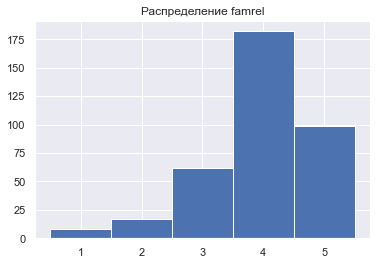

In [71]:
estimate_categorical_feature(grade['famrel'])

In [36]:
get_mode(grade['famrel'])

##  25. Столбец (freetime) — свободное время после школы
Данный столбец имет котегориальный признак, распределенный по нормальномй закону. Заполнять пустые значения следует модой.

В данном столбце 11 незаполненых значений.
Среднее: 3.0


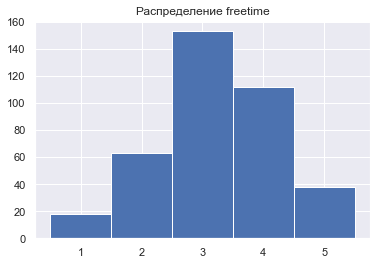

In [73]:
estimate_categorical_feature(grade['freetime'])

In [37]:
get_mode(grade['freetime'])

## 26. Столбец (goout) - проведение времяни с друзьями
Признак данного столбца распределен по нормальному закону и носит котегориальный характер. Заполнять пропущенные значения следует модой.

В данном столбце 8 незаполненых значений.
Среднее: 3.0


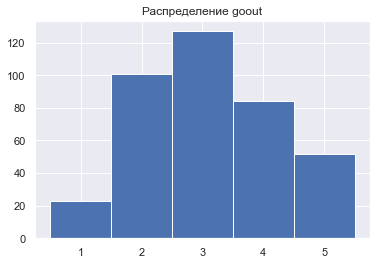

In [75]:
estimate_categorical_feature(grade['goout'])

In [38]:
get_mode(grade['goout'])

## 27. Столбец (health)  - состояние здоровья
Данный столбец носит котегориальный характер, незаполненые значения следует заполнить заполнить модой.

В данном столбце 15 незаполненых значений.
Среднее: 4.0


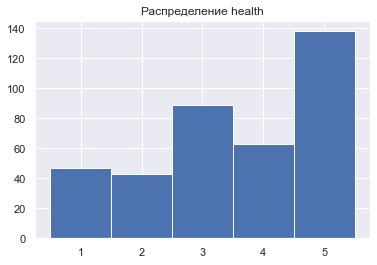

In [77]:
estimate_categorical_feature(grade['health'])

In [39]:
get_mode(grade['health'])

## 28. Столбец (absences) - количество пропущенных занятий
Информация данного столбца несет колличественный признак. Имеются выбросы.
После фильтрации выбросов пропущенные значения следует заполнять модой.

В данном столбце 12 незаполненых значений.
Среднее: 7.0


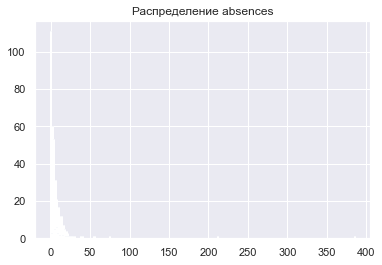

In [79]:
estimate_categorical_feature(grade['absences'])

In [40]:
def remove_outliers(grade: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1, Q3 = grade[column].quantile(0.25), grade[column].quantile(0.75)
    IQR = Q3 - Q1
    grade[column].fillna(((Q3 + 1.5 * IQR)-(Q1 - 1.5 * IQR)).mean(), inplace=True)
    return grade[
        (grade[column] >= Q1 - 1.5 * IQR) &
        (grade[column] <= Q3 + 1.5 * IQR)
    ]

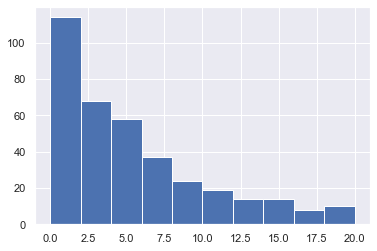

In [41]:
plt.show()
grade = remove_outliers(grade, 'absences')
grade['absences'].hist()
plt.show()

## 29. Столбец (score) - результат экзамена
Данный столбец имеет категориальный характер оценки распределенный по нормальному закону. Значения в данном столбце можно и заполнить, но это окажет прямое воздействие результат анализа. Т.К. пропущенных значений не много их следует просто удалить. Те значения, что обозначены 0, принимать за выброс не стоит. Есть вероятность, что это либо оценка, либо отсутствие ученика на экзамене.

В данном столбце 5 незаполненых значений.
Среднее: 52.0


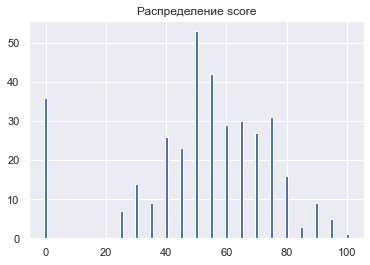

In [82]:
estimate_categorical_feature(grade['score'])

In [42]:
clmn = 'score'
print(f'В столбце {clmn} было пропущенных значений: {grade[clmn].isnull().sum()}')
grade.dropna(
    inplace=True, # чтобы заменить в самом датафрейме не копируя в памяти
    subset=[clmn,], # список колонок, по которым мы хотим удалять пустые значения
    )
print(f'В столбце {clmn} стало пропущенных значений: {grade[clmn].isnull().sum()}')

В столбце score было пропущенных значений: 5
В столбце score стало пропущенных значений: 0


Также в данном Data Frame имеется столбец "granular", он имеет обратную зависимость со столбцом "studytime"

В данном столбце 5 незаполненых значений.
Среднее: -6.0


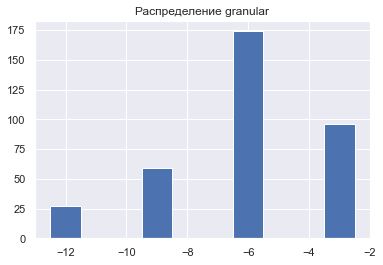

In [84]:
estimate_categorical_feature(grade['granular'])

In [85]:
get_mode(grade['granular'])

## Корреляционный анализ

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


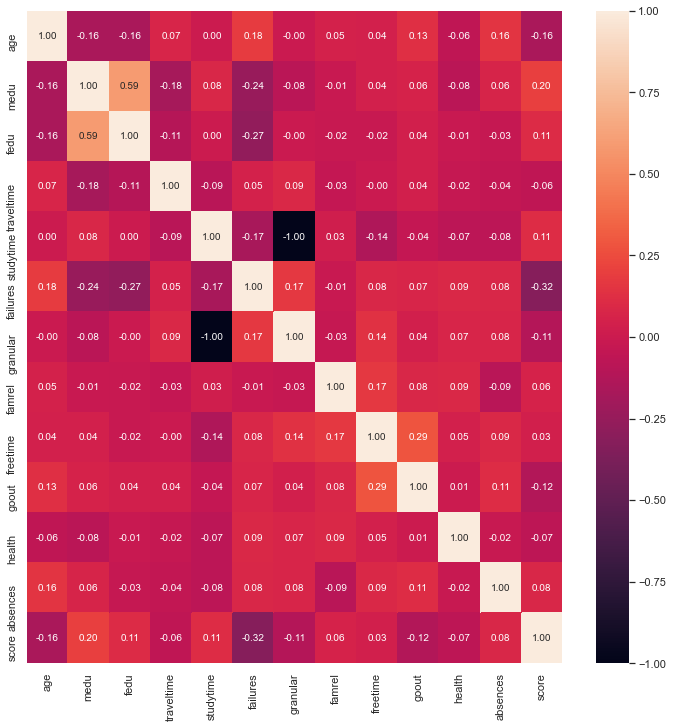

In [44]:
# Посмотрим на скоррелированность переменных между собой
# Определим числовые переменные:
numerical_columns_names = []
categorical_column_names = []
for column in grade.columns:
    if grade[column].dtype == 'float64' or grade[column].dtype == 'int64':
        numerical_columns_names.append(column)
    else:
        categorical_column_names.append(column)

print(numerical_columns_names)
# построим корреляционную матрицу количественных переменных
plt.figure(figsize=(12, 12))
sns.heatmap(grade[numerical_columns_names].corr(), fmt='.2f', annot=True)
plt.show()

Согласно тепловой карты, имеются значемые корреляци следующих признаков:
1. studytime - granular (-1.0)
2. medu - fedu (0.59)
3. groout - freetime (0.29)
4. score - failures (-0.34)

Отсюда следует, что для окончательной модели я удалю признак "studytime", ввиду высокой кореляции с признаком "granular".
Остальные признаки удалять не буду. Хоть и образование родителей имеет высокую степень корреляции, я все равно пока оставлю оба столбца (цель: проверить работу модели и с одним признаком и с другим)

In [45]:
grade.drop(['studytime'], axis = 1, inplace=True)

## Анализ номинативных переменных
Для того, чтобы проверить статистическую зависимость между признакми, путем визуального анализа диаграмм распределения внутри каждой подгруппы, строим диаграммы размаха (boxplot).

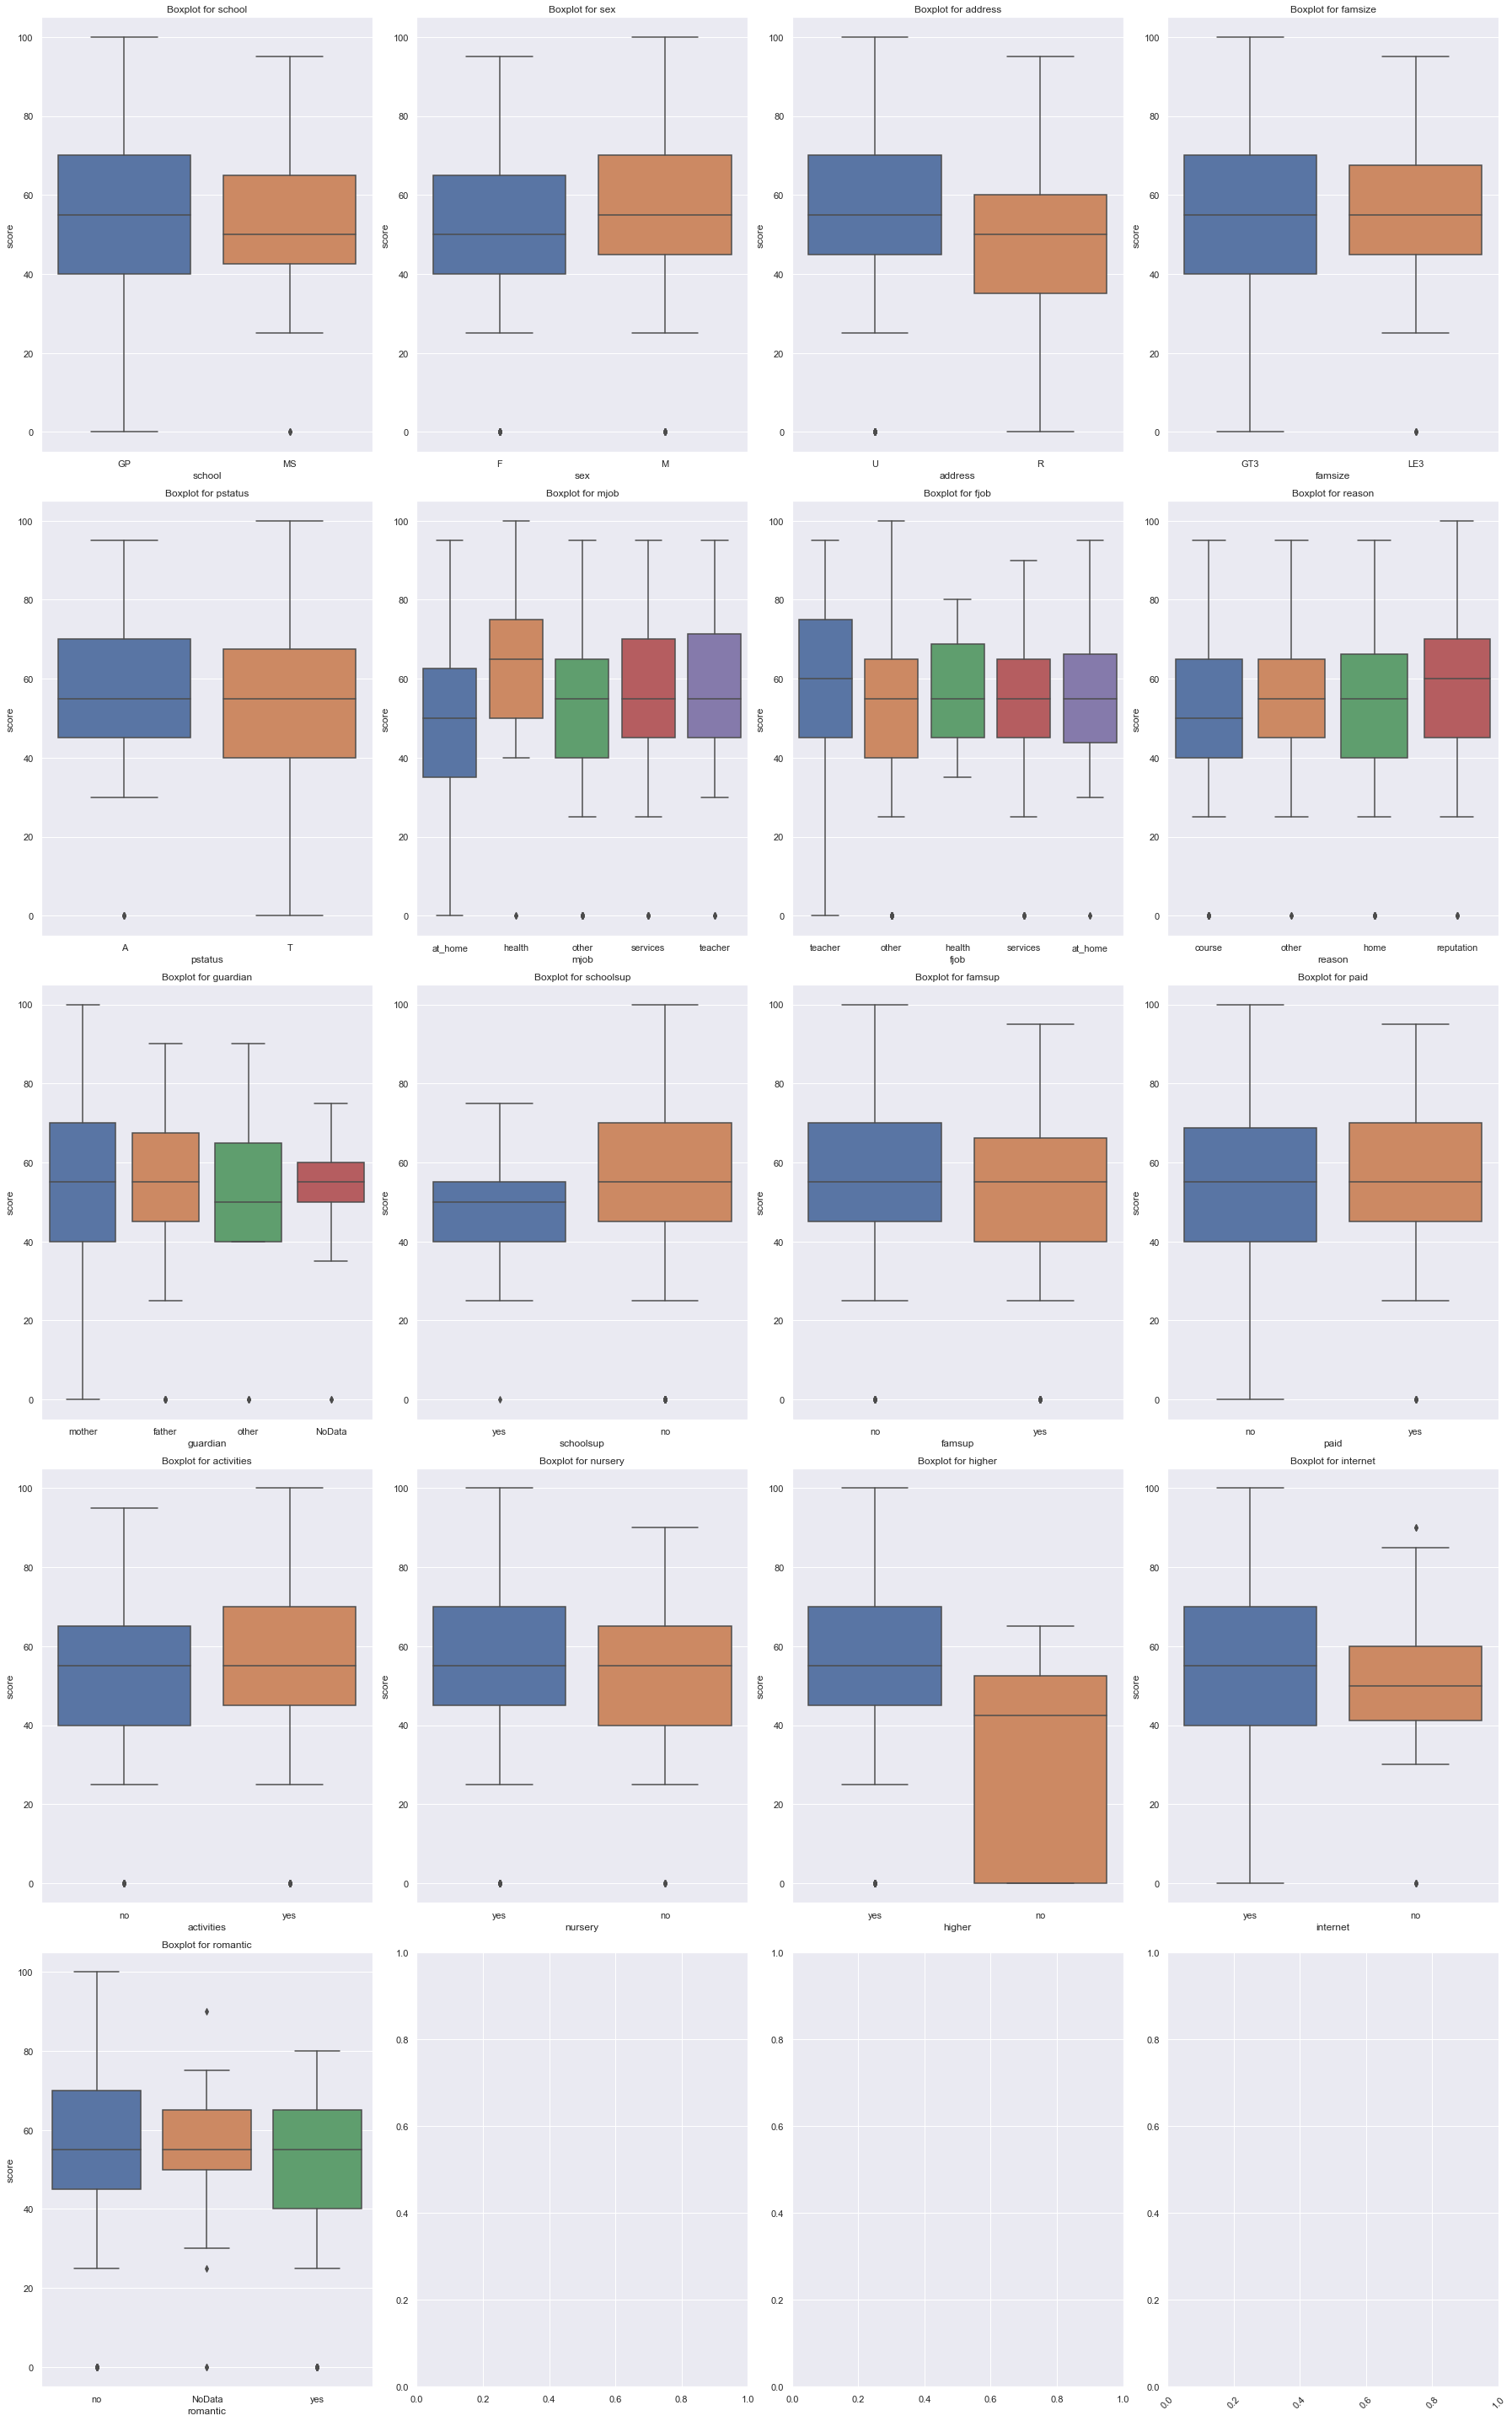

In [46]:
plot_columns(grade, ['school', 'sex', 'address', 'famsize', 'pstatus', 
            'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic'], 5, 4)
plt.tight_layout()
plt.xticks(rotation=45)

plt.savefig('test.png')
plt.show()

Согласно визуальному анализу номинативных переменных на итоговую оценку не оказывают влияние следующие параметры:
- school (школа);
- fjob (работа отца);
- famesize (размер семьи);
- pstatus (статус семейной жизни родителей);
- reason (причина выбора школы);
- guardian (опекун);
- famsup!!! (семейная образовательная поддержка);
- paid!!! (дополниткльные платные занятия по математике);
- activities!!! (дополнительные внеучебные занятия);
- nursery (посещение детского сада);    

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок экзамена по математике по различным параметрам неразличимы:

In [50]:
def get_stat_dif(column):
    cols = grade.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(grade.loc[grade.loc[:, column] == comb[0], 'score'].dropna(), 
                        grade.loc[grade.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 
            'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Исходя из теста, можно сделать вывод, что есть значемые различия в следующих столбцах: sex, address, mjob, higher, romantic. Оставим их для дальнейшего построения модели. 

И так исходная модель будет иметь следующий набор данных.


In [51]:
grade.drop(['school','famsize', 'pstatus', 
            'reason', 'fjob','guardian', 'schoolsup', 
            'famsup', 'paid', 'activities',
            'nursery','internet',], axis = 1, inplace=True)

In [52]:
print(grade.shape)

(361, 17)


In [53]:
grade

,sex,age,address,medu,fedu,mjob,traveltime,failures,granular,higher,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,-6.0,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,1.0,1.0,at_home,1.0,0.0,-6.0,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,1.0,1.0,at_home,1.0,3.0,-6.0,yes,NoData,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,4.0,2.0,health,1.0,0.0,-9.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,3.0,3.0,other,1.0,0.0,-6.0,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,1.0,1.0,other,1.0,1.0,-6.0,yes,no,1.0,1.0,1.0,5.0,0.0,0.0
391,M,17,U,3.0,1.0,services,2.0,0.0,-3.0,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,M,21,R,1.0,1.0,other,1.0,3.0,-3.0,yes,no,5.0,5.0,3.0,3.0,3.0,35.0
393,M,18,R,3.0,2.0,services,3.0,0.0,-3.0,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Выводы:
В результате EDA-анализа влияния факторов жизни студента на итоговую оценку экзамена по математике можно сделать следкющие выводы:
- не смотря на достаточно большое количество факторов мы имеем относительно не большую выборку;
- окло 10 % факторов имеют достаточно большое количество пропусков, удаление которых может влиять на результат;
- выбросов в данных не много, данные достаточно чистые;
- высокая корреляция параметров score - failures (-0.34) показывает, что жизненные неудачи в достаточной степени влияют на учебу;
- параметрами для построения дальнейшей модели послужат: sex, age, address, medu (fedu), mjob, traveltime, failures, granular, higher, romantic, famreal, freetime (goout), health, absence, score.

